### Detecting Pneumonia (89%+ accuracy)

In [61]:
import os
import os.path
from PIL import ImageFont
from os import path
import shutil
import visualkeras
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import cv2
from mlxtend.plotting import plot_confusion_matrix

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/home/oem/Desarrollo/Master/Homework/arf/covid19_x-ray_images/venv/lib/python3.7/site-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [2]:
train_dir = os.path.join('../DataSet1/chest-xray-pneumonia/chest_xray/train')
test_dir = os.path.join('../DataSet1/chest-xray-pneumonia/chest_xray/test')
val_dir = os.path.join('../DataSet1/chest-xray-pneumonia/chest_xray/val')


im = np.array(Image.open(train_dir + '/NORMAL/IM-0115-0001.jpeg'))
print(im.shape)

(1858, 2090)


In [3]:
im_h, im_w = 256, 256

In [4]:
dir_path = 'mod_input'

if path.exists(dir_path):
    print('Eliminando contenido...')
    try:
        shutil.rmtree(dir_path)
    except OSError as e:
        print("Error: %s : %s" % (dir_path, e.strerror))

os.mkdir('mod_input')
os.mkdir('mod_input/test')
os.mkdir('mod_input/train')
os.mkdir('mod_input/val')


os.mkdir('mod_input/test/NORMAL')
os.mkdir('mod_input/test/PNEUMONIA')

os.mkdir('mod_input/train/NORMAL')
os.mkdir('mod_input/train/PNEUMONIA')


os.mkdir('mod_input/val/NORMAL')
os.mkdir('mod_input/val/PNEUMONIA')

Eliminando contenido...


In [5]:
mod_train_dir = os.path.join('mod_input/train')
mod_test_dir = os.path.join('mod_input/test')                             
mod_val_dir = os.path.join('mod_input/val')   

In [6]:
train_NORMAL_dir = os.path.join(train_dir,'NORMAL')
train_NORMAL_imgs = os.listdir(train_NORMAL_dir)
for img in train_NORMAL_imgs:
    im = Image.open(train_NORMAL_dir + '/' + img)
    im = im.resize((im_w, im_h))
    im.save(mod_train_dir + '/NORMAL/' + img)
    
train_PNEUMONIA_dir = os.path.join(train_dir,'PNEUMONIA')
train_PNEUMONIA_imgs = os.listdir(train_PNEUMONIA_dir)
for img in train_PNEUMONIA_imgs:
    im = Image.open(train_PNEUMONIA_dir + '/' + img)
    im = im.resize((im_w, im_h))
    im.save(mod_train_dir + '/PNEUMONIA/' + img)
    

    
test_NORMAL_dir = os.path.join(test_dir,'NORMAL')
test_NORMAL_imgs = os.listdir(test_NORMAL_dir)
for img in test_NORMAL_imgs:
    im = Image.open(test_NORMAL_dir + '/' + img)
    im = im.resize((im_w, im_h))
    im.save(mod_test_dir + '/NORMAL/' + img)
    
test_PNEUMONIA_dir = os.path.join(test_dir,'PNEUMONIA')
test_PNEUMONIA_imgs = os.listdir(test_PNEUMONIA_dir)
for img in test_PNEUMONIA_imgs:
    im = Image.open(test_PNEUMONIA_dir + '/' + img)
    im = im.resize((im_w, im_h))
    im.save(mod_test_dir + '/PNEUMONIA/' + img)
    
val_NORMAL_dir = os.path.join(val_dir,'NORMAL')
val_NORMAL_imgs = os.listdir(val_NORMAL_dir)
for img in val_NORMAL_imgs:
    im = Image.open(val_NORMAL_dir + '/' + img)
    im = im.resize((im_w, im_h))
    im.save(mod_val_dir + '/NORMAL/' + img)
    
val_PNEUMONIA_dir = os.path.join(val_dir,'PNEUMONIA')
val_PNEUMONIA_imgs = os.listdir(val_PNEUMONIA_dir)
for img in val_PNEUMONIA_imgs:
    im = Image.open(val_PNEUMONIA_dir + '/' + img)
    im = im.resize((im_w, im_h))
    im.save(mod_val_dir + '/PNEUMONIA/' + img)

In [7]:
#taking an image for prediction
pr_im = Image.open(mod_test_dir + '/NORMAL/' + test_NORMAL_imgs[4])
pr_im = pr_im.resize((im_w, im_h))
pred_img = np.array(pr_im)
pred_img = pred_img.reshape(1,im_h,im_w,1)
print(pred_img.shape)

(1, 256, 256, 1)


In [8]:
# names = os.listdir(mod_train_dir + '/NORMAL')
# print(names[:5])

In [9]:
model = tf.keras.models.Sequential([
    #first convolution
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(im_h, im_w, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    #second convolution
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
   
    
    #third convolution
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    
    #fourth convolution
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    

    
    #fifth convolution
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    

    
    #sixth convolution
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
   
    
    #seventh convolution
#     tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')

    
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        3

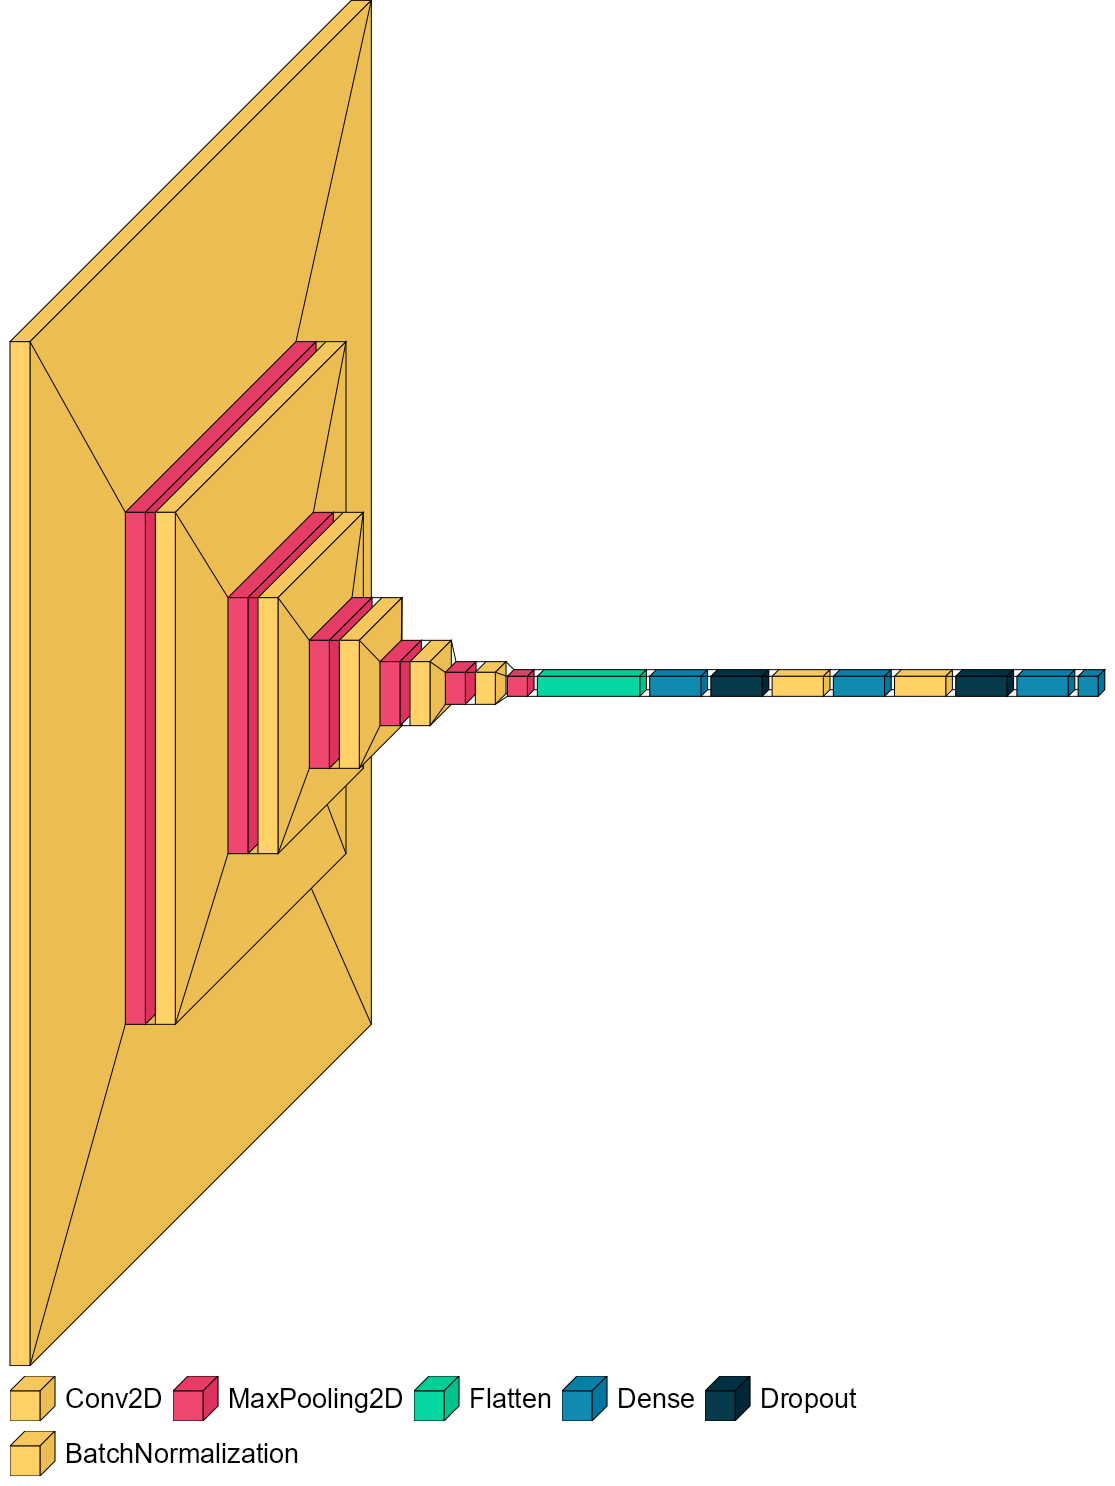

In [25]:
font = ImageFont.truetype("arial.ttf", 27)
visualkeras.layered_view(model, to_file='layered_view.png', font=font, legend=True)

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=0.001),
    metrics=['accuracy']
)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    zoom_range = 0.2,
    shear_range = 0.2,
)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    mod_train_dir,
    batch_size=batch_size,
        color_mode="grayscale",
#     target_size=(im_h, im_w),
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    mod_val_dir,
    batch_size=batch_size,
        color_mode="grayscale",
#     target_size=(im_h, im_w),
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    mod_test_dir,
    batch_size=batch_size,
        color_mode="grayscale",
#     target_size=(im_h, im_w),
    class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [14]:
print(test_datagen, test_generator)

<tensorflow.python.keras.preprocessing.image.ImageDataGenerator object at 0x7f5a703c4f98> <tensorflow.python.keras.preprocessing.image.DirectoryIterator object at 0x7f5a7050f6d8>


In [15]:
call_back = tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True)

In [16]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 100,
    #steps_per_epoch=326,
    callbacks = [call_back]
)

Epoch 1/100
163/163 [==============================] - 146s 883ms/step - loss: 0.5063 - accuracy: 0.7660 - val_loss: 0.6029 - val_accuracy: 0.6250
Epoch 2/100
163/163 [==============================] - 143s 875ms/step - loss: 0.2644 - accuracy: 0.8990 - val_loss: 0.3780 - val_accuracy: 0.7500
Epoch 3/100
163/163 [==============================] - 140s 861ms/step - loss: 0.2122 - accuracy: 0.9131 - val_loss: 0.2976 - val_accuracy: 0.9375
Epoch 4/100
163/163 [==============================] - 140s 860ms/step - loss: 0.1719 - accuracy: 0.9365 - val_loss: 3.8812 - val_accuracy: 0.5000
Epoch 5/100
163/163 [==============================] - 140s 859ms/step - loss: 0.1679 - accuracy: 0.9349 - val_loss: 8.9821 - val_accuracy: 0.5000
Epoch 6/100
163/163 [==============================] - 140s 860ms/step - loss: 0.1820 - accuracy: 0.9411 - val_loss: 0.3153 - val_accuracy: 0.8750
Epoch 7/100
163/163 [==============================] - 140s 860ms/step - loss: 0.1448 - accuracy: 0.9471 - val_loss: 1

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt

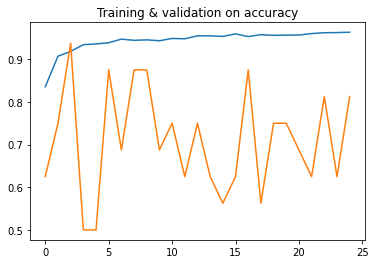

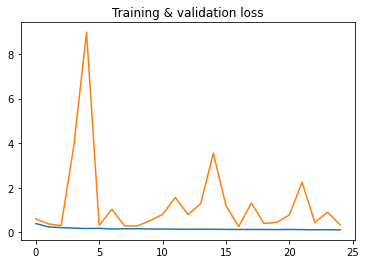

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training & validation on accuracy')
plt.savefig("Training_and_validation_accuracy.png")
plt.figure()

plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title('Training & validation loss')
plt.savefig("Training_and_validation_loss.png")

In [19]:
classes = model.predict(pred_img, batch_size=batch_size)
if classes[0] > 0.5:
    print('X-Ray is predicted to have Pneumonia')
else:
    print('X-Ray is predicted to be Normal')

X-Ray is predicted to be Normal


In [20]:
model.save("Pneumonia_89_accuracy.h5")

In [54]:
score = model.evaluate(test_generator)

print("Loss",score[0])
print("Accuracy",score[1])

20/20 [==============================] - 3s 166ms/step - loss: 0.3805 - accuracy: 0.8894
Loss 0.38046157360076904
Accuracy 0.8894230723381042


In [58]:
main_dir = "../DataSet1/chest-xray-pneumonia/chest_xray/"
def data_processing(img_dims, batch_size):
    
    #Data Augmentation Images
    train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, vertical_flip=True)
    test_val_datagen = ImageDataGenerator(rescale=1./255)
    
    train_gen = train_datagen.flow_from_directory(directory=main_dir + 'train', target_size=(img_dims, img_dims), batch_size=batch_size, class_mode='binary', shuffle=True)
    test_gen = test_val_datagen.flow_from_directory(directory=main_dir + 'test', target_size=(img_dims, img_dims), batch_size=batch_size, class_mode='binary', shuffle=True)

    test_data = []
    test_labels = []
    
    for cond in ['/NORMAL/', '/PNEUMONIA/']:
        for img in (os.listdir(main_dir + 'test' + cond)):
            img = plt.imread(main_dir + 'test'+cond+img)
            img = cv2.resize(img, (img_dims, img_dims))
            img = np.dstack([img, img, img])
            img = img.astype('float32') / 255
            if cond=='/NORMAL/':
                label = 0
            elif cond=='/PNEUMONIA/':
                label = 1
            test_data.append(img)
            test_labels.append(label)
        
    test_data = np.array(test_data)
    test_labels = np.array(test_labels)
    
    return (train_gen, test_gen, test_data, test_labels)

In [59]:
img_dims = 256
batch_size = 32

train_gen, test_gen, test_data, test_labels = data_processing(img_dims, batch_size)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix

preds = model.predict(test_data)

model_acc = accuracy_score(test_labels, np.round(preds))*100
cm = confusion_matrix(test_labels, np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX')
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.savefig("Confusion_matrix.png")
plt.show()

print('\nTESTING METRICS')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(model_acc))
print('Precision: {}%'.format(precision))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))
print('Recall: {}%'.format(recall))


print('\nTRAINING METRICS')
print('Train accuracy: {}'.format(np.round((hist.history['accuracy'][-1])*100, 2)))

ValueError: in user code:

    /home/oem/Desarrollo/Master/Homework/arf/covid19_x-ray_images/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /home/oem/Desarrollo/Master/Homework/arf/covid19_x-ray_images/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/oem/Desarrollo/Master/Homework/arf/covid19_x-ray_images/venv/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/oem/Desarrollo/Master/Homework/arf/covid19_x-ray_images/venv/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/oem/Desarrollo/Master/Homework/arf/covid19_x-ray_images/venv/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/oem/Desarrollo/Master/Homework/arf/covid19_x-ray_images/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /home/oem/Desarrollo/Master/Homework/arf/covid19_x-ray_images/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /home/oem/Desarrollo/Master/Homework/arf/covid19_x-ray_images/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/oem/Desarrollo/Master/Homework/arf/covid19_x-ray_images/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape (None, None, None, 3)
